# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Important:** This notebook was AI-generated and has not been fully verified.
Please be cautious when interpreting the code or results.

This notebook explores the Allen Institute Openscope - Vision2Hippocampus project, available on the DANDI Archive.

[Dandiset 000690](https://dandiarchive.org/dandiset/000690/0.250326.0015)

## What this notebook will cover:

*   Loading the Dandiset metadata
*   Listing the assets in the Dandiset
*   Loading an NWB file from the Dandiset
*   Exploring the contents of the NWB file
*   Visualizing data from the NWB file

## Required packages:

*   pynwb
*   h5py
*   remfile
*   numpy
*   matplotlib
*   seaborn

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading an NWB file

In this section, we will load an NWB file and explore its contents.
We will load the file `sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb`.
The URL for this file is: `https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/`

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Load
url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(nwb)
print(f"Dandiset name: {nwb.session_description}")
print(f"Dandiset URL: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x139684478019408
Fields:
  acquisition: {
    probe_0_lfp <class 'pynwb.ecephys.LFP'>,
    probe_0_lfp_data <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    probeA <class 'abc.EcephysProbe'>
  }
  electrode_groups: {
    probeA <class 'abc.EcephysElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2025, 2, 25, 16, 39, 27, 896345, tzinfo=tzoffset(None, -28800))]
  identifier: 0
  institution: Allen Institute for Brain Science
  session_description: LFP data and associated info for one probe
  session_id: 1298465622
  session_start_time: 2023-09-21 00:00:00-07:00
  stimulus_notes: OpenScopeVision2Hippocampus
  subject: subject abc.EcephysSpecimen at 0x139684476058896
Fields:
  age: P82D
  age__reference: birth
  age_in_days: 82.0
  genotype: wt/wt
  sex: M
  species: Mus musculus
  specimen_name: 692072
  strain: Transgenic
  subject_id: 692072

  timestamps_reference_time: 

You can explore this NWB file on neurosift using the following link:

[Neurosift link](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft)

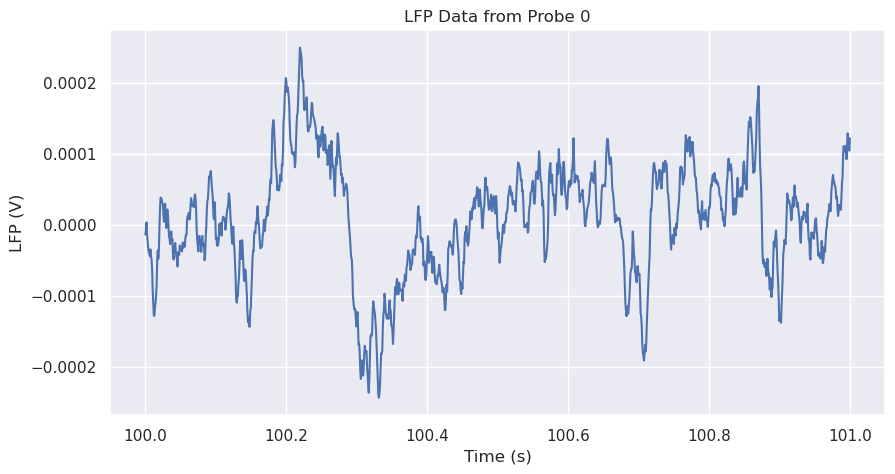

In [3]:
# Load LFP data and timestamps
lfp_data = nwb.acquisition["probe_0_lfp"].electrical_series["probe_0_lfp_data"].data
lfp_timestamps = nwb.acquisition["probe_0_lfp"].electrical_series["probe_0_lfp_data"].timestamps

# Select a small segment of data
start_time = 100
end_time = 101
start_index = np.searchsorted(lfp_timestamps, start_time)
end_index = np.searchsorted(lfp_timestamps, end_time)

lfp_data_segment = lfp_data[start_index:end_index, 0]
lfp_timestamps_segment = lfp_timestamps[start_index:end_index]

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(lfp_timestamps_segment, lfp_data_segment)
plt.xlabel("Time (s)")
plt.ylabel("LFP (V)")
plt.title("LFP Data from Probe 0")
plt.show()